<a href="https://colab.research.google.com/github/filipefelisardo/Clepsydra/blob/main/precipitacoes1999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               DATA  BARRAGEM DE ODIVELAS (24I/03C)  \
0  01/01/1999 09:00                            80.5   
1  01/02/1999 09:00                            10.5   
2  01/03/1999 09:00                            58.8   
3  01/04/1999 09:00                            36.7   
4  01/05/1999 09:00                            31.1   

   BARRAGEM DE PEGO DO ALTAR (23G/01C)  BARRAGEM DO DIVOR (21J/03C)  \
0                                 77.8                         80.6   
1                                 19.9                         19.6   
2                                 67.0                         62.9   
3                                 38.9                         18.2   
4                                 38.3                         39.0   

   BARRAGEM DO ROXO (26I/02C)  GRÂNDOLA (24F/01C)  \
0                        66.7                84.9   
1                         7.6                14.8   
2                        54.1                77.9   
3                        43.9 

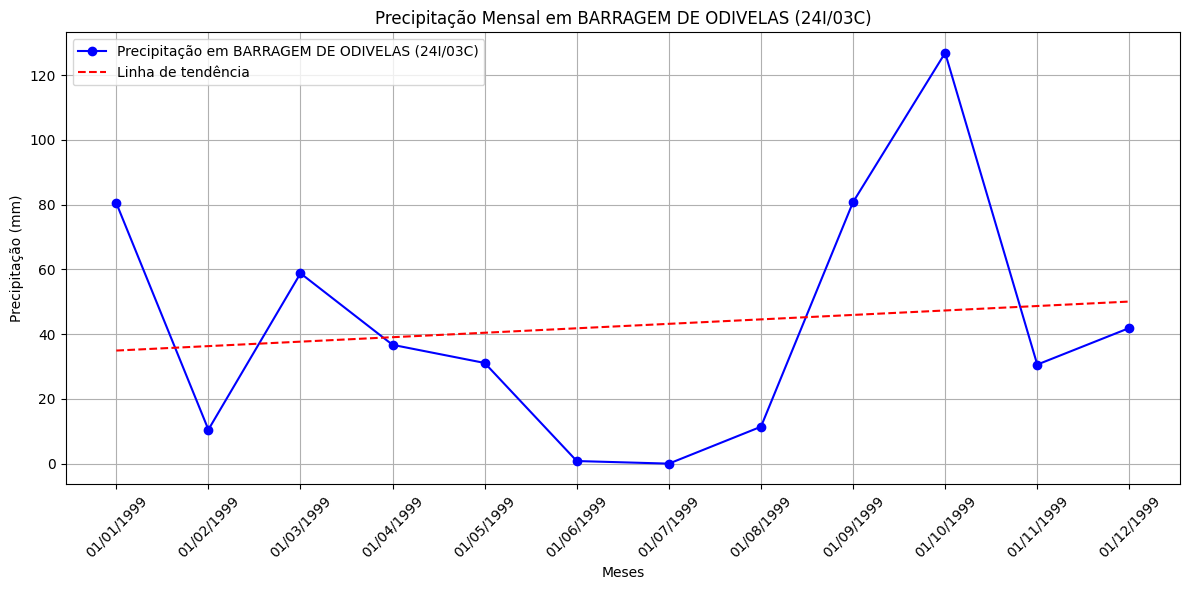

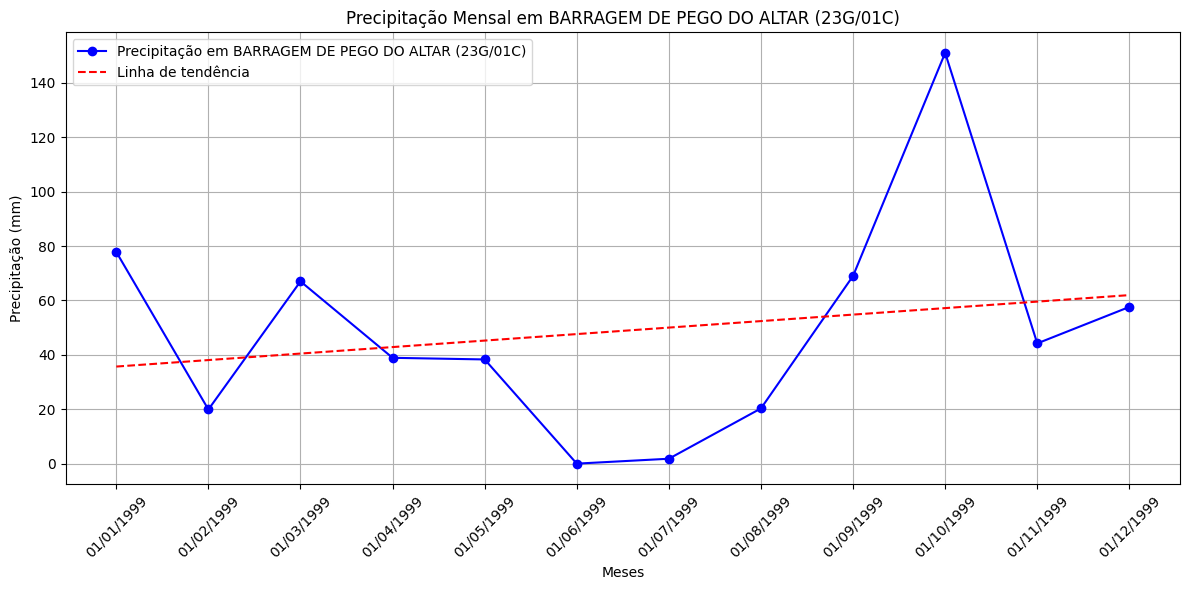

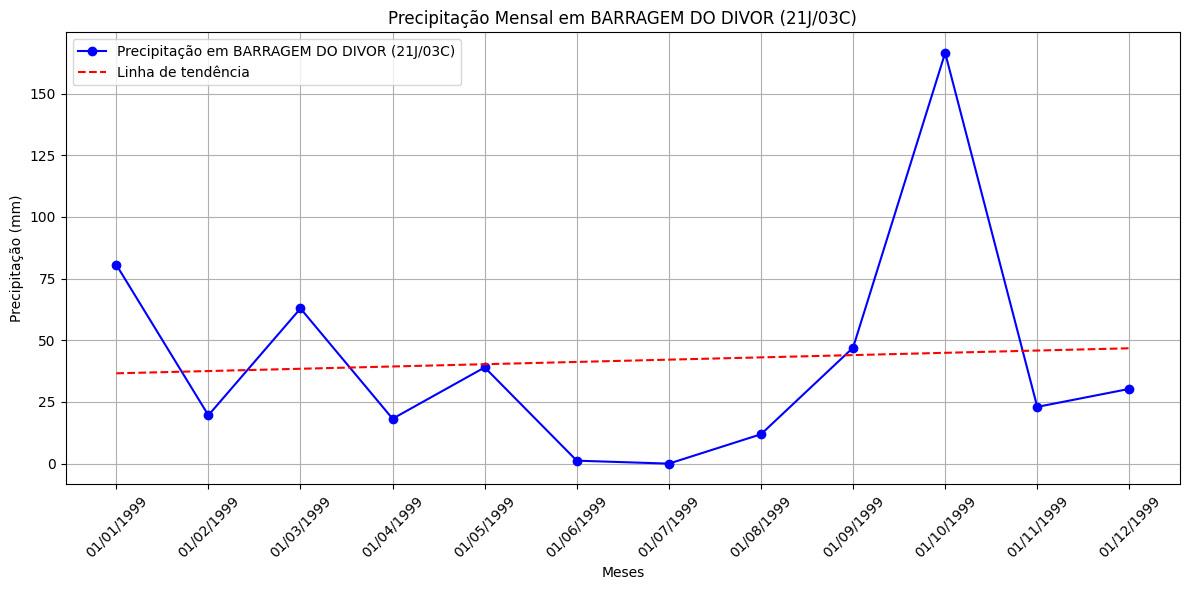

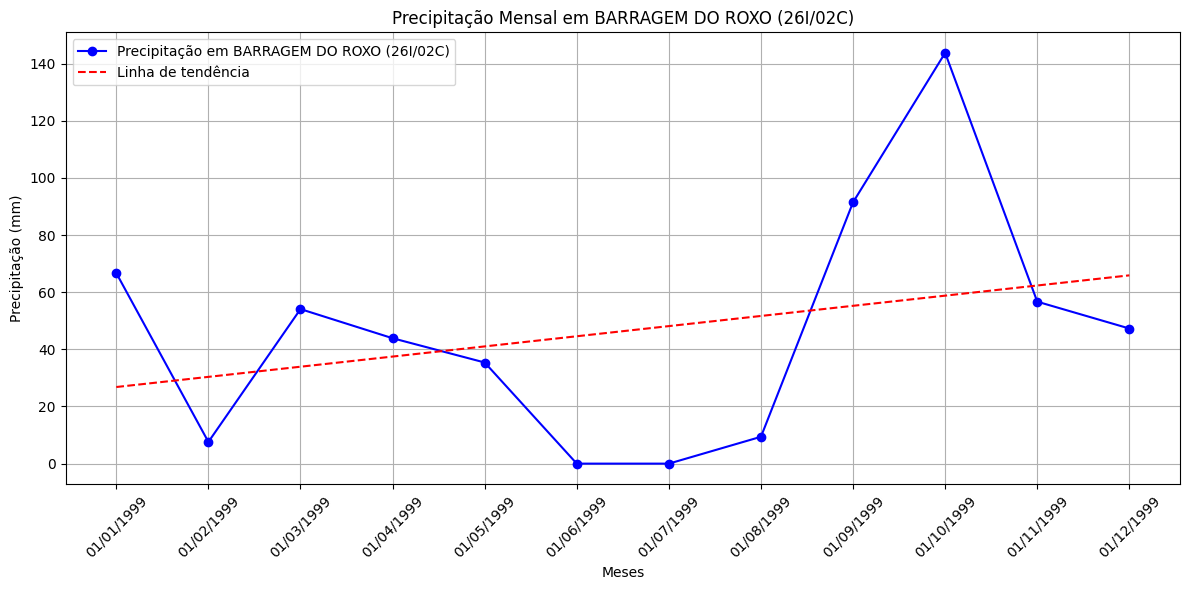

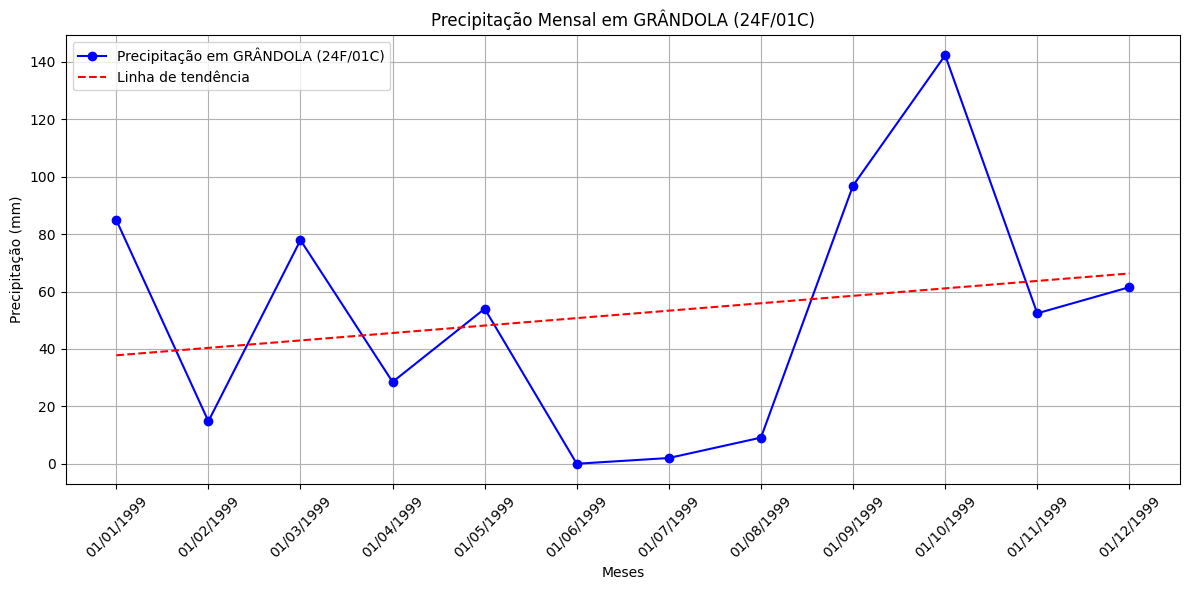

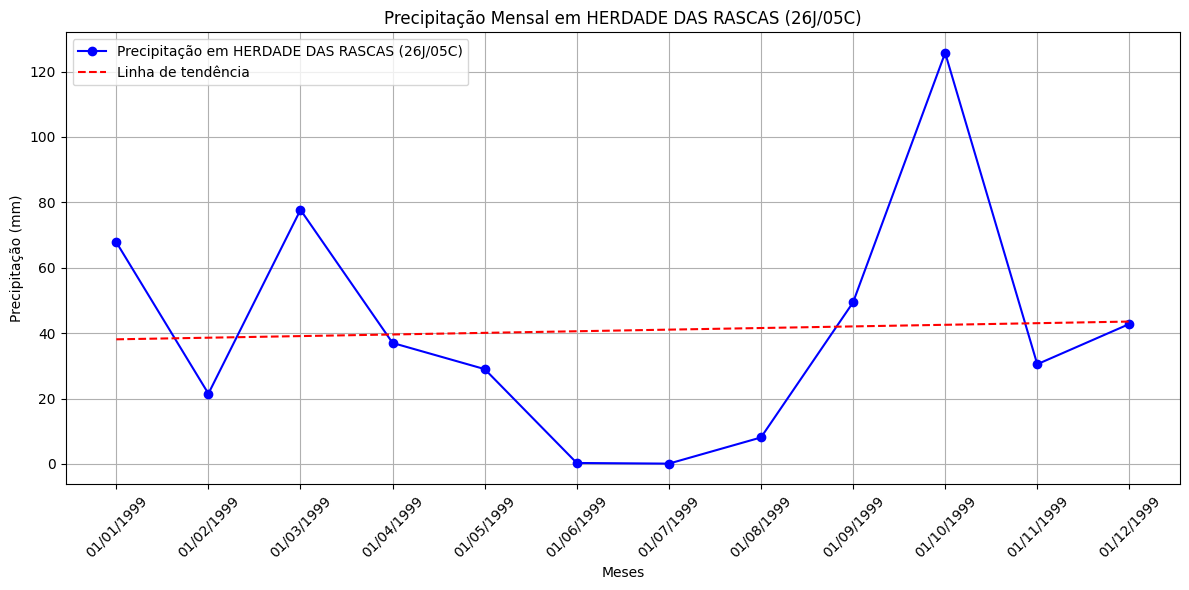

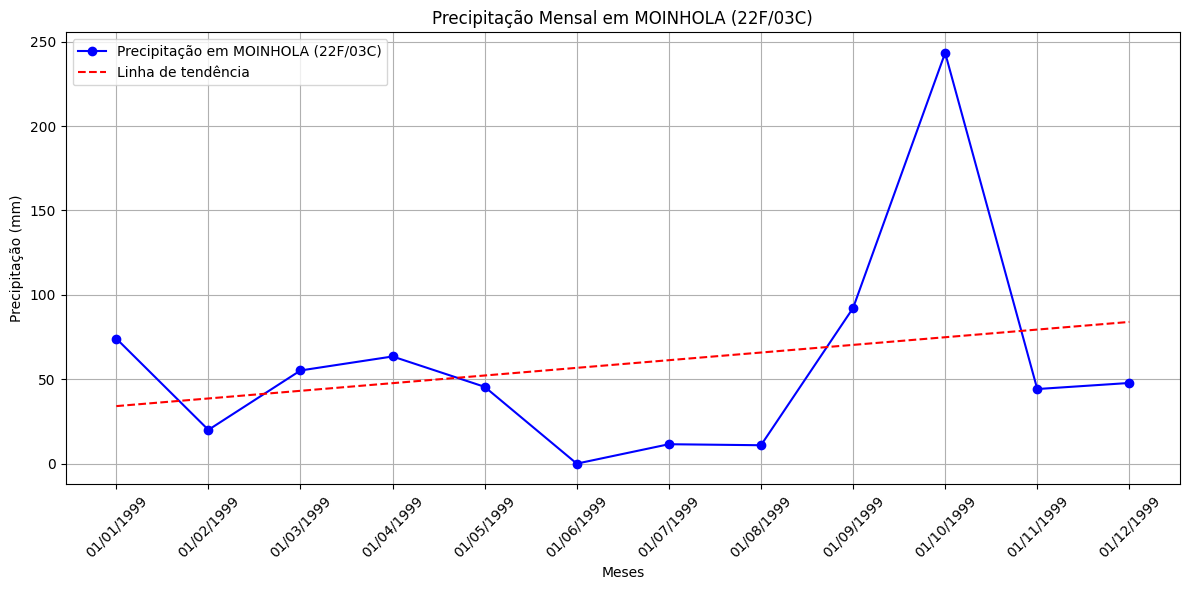

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo XLSX
file_path = 'precipitacoes_mensais_1999.xlsx'  # Atualize para o caminho correto do seu arquivo
df = pd.read_excel(file_path)

# Verificar as primeiras linhas do dataframe para entender a estrutura dos dados
print(df.head())

# Assumindo que a primeira coluna contém os meses e as outras colunas são estações
df['DATA'] = df['DATA'].str[:10]  # Extraindo apenas a data
df.set_index('DATA', inplace=True)

# Verificar o índice e colunas do dataframe
print(df.index)
print(df.columns)

# Função para adicionar linha de tendência
def add_trendline(ax, x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='r', label='Linha de tendência')

# Plotar gráficos de precipitação para cada estação
for column in df.columns:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df.index))
    y = df[column].astype(float).values
    plt.plot(df.index, y, label=f'Precipitação em {column}', color='b', linestyle='-', marker='o')

    # Adicionar linha de tendência
    ax = plt.gca()
    add_trendline(ax, x, y)

    plt.title(f'Precipitação Mensal em {column}')
    plt.xlabel('Meses')
    plt.ylabel('Precipitação (mm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
